In [2]:
import sqlalchemy
from sqlalchemy import create_engine, text, func
from sqlalchemy import Column, Integer, String, Float
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import Session
from sqlalchemy.ext.automap import automap_base
from sqlalchemy import inspect
import pandas as pd
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
import json
import os


In [ ]:
# Setting up an engine connection dependencies
username = 'zoouri'
password = 'project3'
hostname = 'localhost' 
port = '5432' 
database_name = 'fitness_database'

# Creating a connection string
connection_string = f'postgresql://{username}:{password}@{hostname}:{port}/{database_name}'

# Creating an engine
engine = create_engine(connection_string)

# Testing the connection
try:
    with engine.connect():
        print("Connection successful!")
except Exception as e:
    print(f"Connection failed! Error: {str(e)}")

Connection successful!


In [ ]:
#Checking the tables' columns and types
inspector = inspect(engine)
tables = inspector.get_table_names()
for table in tables:
    columns = inspector.get_columns(table)
    print([table])
    for x in columns:
        print(x['name'],x['type'])
    print('----')

['exercise']
id INTEGER
exercise VARCHAR(250)
duration INTEGER
calories_burnt NUMERIC(10, 2)
exercise_intensity INTEGER
----
['weight_bmi']
id INTEGER
age INTEGER
gender VARCHAR(250)
dream_weight NUMERIC(10, 2)
actual_weight NUMERIC(10, 2)
bmi NUMERIC(10, 2)
----
['age']
id INTEGER
calories_burnt NUMERIC(10, 2)
heart_rate INTEGER
age INTEGER
gender VARCHAR(250)
----
['clean_table_test']
participant_id INTEGER
age INTEGER
gender INTEGER
Exercise Type (1-10) INTEGER
Exercise Intensity VARCHAR(250)
Exercise Duration (Minute) INTEGER
Calories Burnt (Cal) DOUBLE_PRECISION
Calories Burnt (60 min) DOUBLE_PRECISION
Heart Rate (BPM) INTEGER
bmi DOUBLE_PRECISION
Recorded Weight (Kg) INTEGER
Dream Weight (Kg) INTEGER
----
['clean_table']
index BIGINT
Participant ID BIGINT
Age (Years) BIGINT
Gender BIGINT
Exercise Type (4 and 9) BIGINT
Exercise Intensity BIGINT
Exercise Duration (Minute) BIGINT
Calories Burnt (Cal) DOUBLE_PRECISION
Calories Burnt (60 min) DOUBLE_PRECISION
Heart Rate (BPM) BIGINT
B

In [ ]:
#Dataframe for exercise table
exercise_df = pd.read_sql('select * from exercise', engine)
exercise_df

,id,exercise,duration,calories_burnt,exercise_intensity
0,1,Exercise 2,37,286.96,5
1,2,Exercise 7,43,343.45,5
2,3,Exercise 4,20,261.22,4
3,4,Exercise 5,39,127.18,10
4,5,Exercise 10,34,416.32,3
...,...,...,...,...,...
3859,3860,Exercise 5,22,154.11,7
3860,3861,Exercise 4,49,486.39,5
3861,3862,Exercise 4,56,264.31,9
3862,3863,Exercise 9,60,185.95,1


In [ ]:
#Data type for exercise.df
exercise_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3864 entries, 0 to 3863
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  3864 non-null   int64  
 1   exercise            3864 non-null   object 
 2   duration            3864 non-null   int64  
 3   calories_burnt      3864 non-null   float64
 4   exercise_intensity  3864 non-null   int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 151.1+ KB


In [ ]:
#Dataframe for age table
age_df = pd.read_sql('select * from age', engine)
age_df

,id,calories_burnt,heart_rate,age,gender
0,1,286.96,170,45,Male
1,2,343.45,142,25,Male
2,3,261.22,148,20,Male
3,4,127.18,170,33,Male
4,5,416.32,118,29,Female
...,...,...,...,...,...
3859,3860,154.11,139,20,Female
3860,3861,486.39,160,21,Female
3861,3862,264.31,167,57,Male
3862,3863,185.95,128,58,Female


In [ ]:
#Data type for age.df
age_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3864 entries, 0 to 3863
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              3864 non-null   int64  
 1   calories_burnt  3864 non-null   float64
 2   heart_rate      3864 non-null   int64  
 3   age             3864 non-null   int64  
 4   gender          3864 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 151.1+ KB


In [ ]:
#Dataframe for weight_bmi table
weight_bmi_df = pd.read_sql('select * from weight_bmi', engine)
weight_bmi_df

,id,age,gender,dream_weight,actual_weight,bmi
0,1,45,Male,91.89,96.30,29.43
1,2,25,Male,64.17,61.10,21.29
2,3,20,Male,70.85,71.77,27.90
3,4,33,Male,79.48,82.98,33.73
4,5,29,Female,89.96,85.64,23.29
...,...,...,...,...,...,...
3859,3860,20,Female,98.15,96.75,32.45
3860,3861,21,Female,97.60,92.70,26.60
3861,3862,57,Male,94.95,96.78,31.44
3862,3863,58,Female,64.74,68.66,19.77


In [ ]:
#Data type for weight_bmi_df
weight_bmi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3864 entries, 0 to 3863
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             3864 non-null   int64  
 1   age            3864 non-null   int64  
 2   gender         3864 non-null   object 
 3   dream_weight   3864 non-null   float64
 4   actual_weight  3864 non-null   float64
 5   bmi            3864 non-null   float64
dtypes: float64(3), int64(2), object(1)
memory usage: 181.2+ KB


In [ ]:
## MERGING 2 TABLES TOGETHER

# Specify the common columns between the merged table 'exercise_df' and 'age_df' 
common_columns_1 = ['id', 'calories_burnt']
#merging tables 'exercise_df' and 'age_df'
merged_table = pd.merge(exercise_df, age_df,  on=common_columns_1)
# Display the merged table
merged_table.head()

,id,exercise,duration,calories_burnt,exercise_intensity,heart_rate,age,gender
0,1,Exercise 2,37,286.96,5,170,45,Male
1,2,Exercise 7,43,343.45,5,142,25,Male
2,3,Exercise 4,20,261.22,4,148,20,Male
3,4,Exercise 5,39,127.18,10,170,33,Male
4,5,Exercise 10,34,416.32,3,118,29,Female


In [ ]:
## MERGING ALL TABLES TOGETHER

# Specify the common columns between the merged table 'exercise_df' and 'age_df' and that of 'weight_bmi_df' table 
common_columns_2 = ['id', 'age', 'gender']
#Merging all three tables into 1 keeping id, age and gender common
merged_table_final = pd.merge(merged_table, weight_bmi_df,  on=common_columns_2)
# Display the merged table
merged_table_final.head()

,id,exercise,duration,calories_burnt,exercise_intensity,heart_rate,age,gender,dream_weight,actual_weight,bmi
0,1,Exercise 2,37,286.96,5,170,45,Male,91.89,96.30,29.43
1,2,Exercise 7,43,343.45,5,142,25,Male,64.17,61.10,21.29
2,3,Exercise 4,20,261.22,4,148,20,Male,70.85,71.77,27.90
3,4,Exercise 5,39,127.18,10,170,33,Male,79.48,82.98,33.73
4,5,Exercise 10,34,416.32,3,118,29,Female,89.96,85.64,23.29


In [ ]:
merged_table_final.count()

id                    3864
exercise              3864
duration              3864
calories_burnt        3864
exercise_intensity    3864
heart_rate            3864
age                   3864
gender                3864
dream_weight          3864
actual_weight         3864
bmi                   3864
dtype: int64

In [ ]:
# Rename columns
merged_renamed= merged_table_final.rename(columns={'id': 'Participant ID', 'age': 'Age (Years)', 'gender': 'Gender', 
                                                           'exercise': 'Exercise Type (1-10)', 'exercise_intensity': 'Exercise Intensity', 
                                                           'duration': 'Exercise Duration (Minute)', 'calories_burnt': 'Calories Burnt (Cal)', 
                                                           'heart_rate': 'Heart Rate (BPM)', 'bmi': 'BMI','actual_weight' : 'Recorded Weight (Kg)', 
                                                           'dream_weight': 'Dream Weight (Kg)'})
#Quantify the Exercise Type column 
merged_renamed['Exercise Type (1-10)'] = merged_renamed['Exercise Type (1-10)'].str.replace('Exercise ', '')

#Normalise Calories Burnt: Calories burnt during 60 mins of training for each participant
merged_renamed['Calories Burnt (60 min)'] = merged_renamed['Calories Burnt (Cal)'] * 60 / merged_renamed['Exercise Duration (Minute)']

# Rearrange columns
updated_df = merged_renamed[['Participant ID','Age (Years)','Gender', 
                                                           'Exercise Type (1-10)', 'Exercise Intensity', 
                                                           'Exercise Duration (Minute)', 'Calories Burnt (Cal)','Calories Burnt (60 min)',
                                                           'Heart Rate (BPM)','BMI','Recorded Weight (Kg)', 
                                                           'Dream Weight (Kg)']]

# Rounds all values to 2 decimal points
updated_df= updated_df.round(decimals=2)  

updated_df.head()

,Participant ID,Age (Years),Gender,Exercise Type (1-10),Exercise Intensity,Exercise Duration (Minute),Calories Burnt (Cal),Heart Rate (BPM),BMI,Recorded Weight (Kg),Dream Weight (Kg)
0,1,45,Male,Exercise 2,5,37,286.96,170,29.43,96.30,91.89
1,2,25,Male,Exercise 7,5,43,343.45,142,21.29,61.10,64.17
2,3,20,Male,Exercise 4,4,20,261.22,148,27.90,71.77,70.85
3,4,33,Male,Exercise 5,10,39,127.18,170,33.73,82.98,79.48
4,5,29,Female,Exercise 10,3,34,416.32,118,23.29,85.64,89.96


In [ ]:
updated_df.dtypes

Participant ID                  int64
Age (Years)                     int64
Gender                         object
Exercise Type (1-10)           object
Exercise Intensity              int64
Exercise Duration (Minute)      int64
Calories Burnt (Cal)          float64
Calories Burnt (60 min)       float64
Heart Rate (BPM)                int64
BMI                           float64
Recorded Weight (Kg)          float64
Dream Weight (Kg)             float64
dtype: object

In [ ]:
# Convert necessary columns to integers
updated_df['Exercise Type (1-10)'] = updated_df['Exercise Type (1-10)'].astype(int)
updated_df['Recorded Weight (Kg)'] = updated_df['Recorded Weight (Kg)'].astype(int)
updated_df['Dream Weight (Kg)'] = updated_df['Dream Weight (Kg)'].astype(int)

In [ ]:
#confirm changes
updated_df.dtypes

Participant ID                  int64
Age (Years)                     int64
Gender                         object
Exercise Type (1-10)            int64
Exercise Intensity              int64
Exercise Duration (Minute)      int64
Calories Burnt (Cal)          float64
Calories Burnt (60 min)       float64
Heart Rate (BPM)                int64
BMI                           float64
Recorded Weight (Kg)            int64
Dream Weight (Kg)               int64
dtype: object

In [ ]:
# Changing Gender value types from Object to Int by setting 'female' to 1 and 'male' to 0
gender_mapping = {'Female': 1, 'Male': 0}
updated_df_quantified = updated_df
# Applying to the latesT dataframe
updated_df_quantified['Gender'] = updated_df_quantified['Gender'].map(gender_mapping)
updated_df_quantified


,Participant ID,Age (Years),Gender,Exercise Type (1-10),Exercise Intensity,Exercise Duration (Minute),Calories Burnt (Cal),Calories Burnt (60 min),Heart Rate (BPM),BMI,Recorded Weight (Kg),Dream Weight (Kg)
0,1,45,0,2,5,37,286.96,465.34,170,29.43,96,91
1,2,25,0,7,5,43,343.45,479.23,142,21.29,61,64
2,3,20,0,4,4,20,261.22,783.66,148,27.90,71,70
3,4,33,0,5,10,39,127.18,195.66,170,33.73,82,79
4,5,29,1,10,3,34,416.32,734.68,118,23.29,85,89
...,...,...,...,...,...,...,...,...,...,...,...,...
3859,3860,20,1,5,7,22,154.11,420.30,139,32.45,96,98
3860,3861,21,1,4,5,49,486.39,595.58,160,26.60,92,97
3861,3862,57,0,4,9,56,264.31,283.19,167,31.44,96,94
3862,3863,58,1,9,1,60,185.95,185.95,128,19.77,68,64


In [ ]:
#confirm changes
updated_df_quantified.dtypes

Participant ID                  int64
Age (Years)                     int64
Gender                          int64
Exercise Type (1-10)            int64
Exercise Intensity              int64
Exercise Duration (Minute)      int64
Calories Burnt (Cal)          float64
Calories Burnt (60 min)       float64
Heart Rate (BPM)                int64
BMI                           float64
Recorded Weight (Kg)            int64
Dream Weight (Kg)               int64
dtype: object

In [ ]:
# The Average 'Calories Burnt (60 min)'  for each exercise type
avg_calories_burnt_index = updated_df_quantified.groupby('Exercise Type (1-10)')['Calories Burnt (60 min)'].mean()
avg_calories_burnt_index

Exercise Type (1-10)
1     476.716303
2     490.769884
3     491.728390
4     511.828221
5     499.287970
6     499.767060
7     503.908575
8     485.268866
9     512.550863
10    484.847286
Name: Calories Burnt (60 min), dtype: float64

In [ ]:
#Finding top 3 highest average 'Calories Burnt (60 min)'  for each exercise type
top2_avg_burnt_exs = avg_calories_burnt_index.nlargest(2)
top2_avg_burnt_exs

Exercise Type (1-10)
9    512.550863
4    511.828221
Name: Calories Burnt (60 min), dtype: float64

In [ ]:
#finding total number of participants for each exercise
exercise_type_counts = updated_df_quantified['Exercise Type (1-10)'].value_counts().sort_index()
exercise_type_counts

Exercise Type (1-10)
1     403
2     345
3     385
4     371
5     404
6     381
7     386
8     397
9     394
10    398
Name: count, dtype: int64

In [ ]:
## Confirming that the data in the main table are comparable based on gender and the ratio of participants for each type of exercise from each gender

# Finding corresponding number of participants from each gender groups taking on each exercise type sorted by exercise number
participant_count_per_gender_exs = updated_df_quantified.groupby(['Gender', 'Exercise Type (1-10)']).size().reset_index(name='Count of Participants').sort_values(by='Exercise Type (1-10)')

# Create a dictionary mapping each exercise type to its corresponding total count
exercise_type_total_count_dict = exercise_type_counts.to_dict()
# Add a new column 'Exercise Type Total Participants' 
participant_count_per_gender_exs['Exercise Type Total Participants'] = participant_count_per_gender_exs['Exercise Type (1-10)'].map(exercise_type_total_count_dict)

#Reseting the index and starting from 1
participant_count_per_gender_exs.reset_index(drop=True, inplace=True)
participant_count_per_gender_exs.index += 1

#Adding a new column to show ratio of each gender for the participants of each exercise type
participant_count_per_gender_exs['Ratio %'] = participant_count_per_gender_exs['Count of Participants'] * 100 / participant_count_per_gender_exs['Exercise Type Total Participants']
participant_count_per_gender_exs.astype(int)

participant_count_per_gender_exs

,Gender,Exercise Type (1-10),Count of Participants
0,0,1,186
10,1,1,217
1,0,2,175
11,1,2,170
2,0,3,179
12,1,3,206
3,0,4,180
13,1,4,191
4,0,5,198
14,1,5,206


In [ ]:
# Display the filtered table for exercise 4 and 9
gender_ratio_exs_filtered = participant_count_per_gender_exs[(participant_count_per_gender_exs['Exercise Type (1-10)'] == 4) | (participant_count_per_gender_exs['Exercise Type (1-10)'] == 9)]
gender_ratio_exs_filtered.reset_index(drop=True, inplace=True)
gender_ratio_exs_filtered.astype(int)
#Ratio for all exercise types from each gender are comparable and close to 50%-50%

,Gender,Exercise Type (1-10),Count of Participants,Exercise Type Total Participants,Ratio %
0,0,4,180,371,48
1,1,4,191,371,51
2,1,9,192,394,48
3,0,9,202,394,51


In [ ]:
# Display the filtered main table for exercise 4 and 9
updated_df_quantified_filtered = updated_df_quantified[(updated_df_quantified['Exercise Type (1-10)'] == 4) | (updated_df_quantified['Exercise Type (1-10)'] == 9)]
updated_df_quantified_filtered.reset_index(drop=True, inplace=True)
updated_df_quantified_filtered.index += 1
clean_table = updated_df_quantified_filtered.rename(columns={'Exercise Type (1-10)': 'Exercise Type (4 and 9)'})
clean_table

,Participant ID,Age (Years),Gender,Exercise Type (4 and 9),Exercise Intensity,Exercise Duration (Minute),Calories Burnt (Cal),Calories Burnt (60 min),Heart Rate (BPM),BMI,Recorded Weight (Kg),Dream Weight (Kg)
1,3,20,0,4,4,20,261.22,783.66,148,27.90,71,70
2,7,18,0,9,10,53,457.63,518.07,103,34.59,61,65
3,8,42,0,4,2,25,272.96,655.10,104,22.05,62,64
4,20,49,0,9,8,59,103.34,105.09,149,20.45,84,88
5,22,29,0,9,2,37,131.46,213.18,135,20.54,52,54
...,...,...,...,...,...,...,...,...,...,...,...,...
761,3850,56,0,9,3,54,113.94,126.60,102,31.93,67,68
762,3853,37,1,9,3,35,132.48,227.11,178,28.65,66,64
763,3861,21,1,4,5,49,486.39,595.58,160,26.60,92,97
764,3862,57,0,4,9,56,264.31,283.19,167,31.44,96,94


In [ ]:
# Define the output folder 
output_folder = 'output_folder'

# Create the folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

#save the table to csv file
clean_table.to_csv(os.path.join(output_folder,'Final_Cleaned_Data.csv'), index=False)

# Displaying the types for future table reference in SQL
clean_table.dtypes

In [ ]:
# Loading final table to the SQL database engine and replacing if it already exists.
clean_table.to_sql('clean_table', engine, if_exists="replace")

765

In [1]:
# Create a scatter plot with seaborn for exercise 4 & 9 for each gender

sns.scatterplot(data=clean_table, y='Calories Burnt (60 min)', x='Gender', hue='Exercise Type (4 and 9)', style='Gender', markers=['o', 's'])
plt.legend(title='Exercise Type')
plt.xticks([0, 1])
plt.savefig(os.path.join(output_folder,'Seaborn.png'))
plt.show()

NameError: name 'sns' is not defined

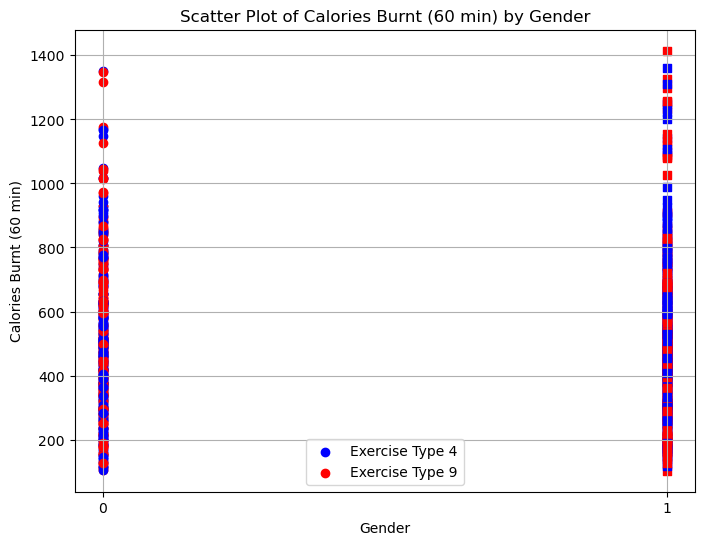

In [ ]:
# Create a scatter plot with Matplotlib for exercise 4 & 9 for each gender
plt.figure(figsize=(8, 6))

# Iterate over the filtered data and plot each point
for index, row in clean_table.iterrows():
    # Define marker shape based on gender
    marker = 'o' if row['Gender'] == 0 else 's'
    # Define marker color based on exercise type
    color = 'blue' if row['Exercise Type (4 and 9)'] == 4 else 'red'
    # Plot the point
    plt.scatter(row['Gender'], row['Calories Burnt (60 min)'], color=color, marker=marker)


plt.xticks([0, 1])
plt.legend(['Exercise Type 4', 'Exercise Type 9'])
plt.ylabel('Calories Burnt (60 min)')
plt.xlabel('Gender')
plt.title('Scatter Plot of Calories Burnt (60 min) by Gender')
plt.grid(True)
plt.savefig(os.path.join(output_folder,'Matplotlib.png'))
plt.show()


In [ ]:
# Create a scatter plot with Altair for exercise 4 & 9 for each gender

scatter_plot = alt.Chart(clean_table).mark_circle().encode(
    y='Calories Burnt (60 min)',
    x=alt.X('Gender:N', axis=alt.Axis(values=[0, 1], title='Gender')),
    color=alt.Color('Exercise Type (4 and 9):N', title='Exercise Type'),
    shape=alt.Shape('Gender:N', title='Gender')
).properties(
    width=400,
    height=200
)

scatter_plot

alt.Chart(...)

In [ ]:
## BENEFITS OF USING ALTAIR 

# Export the JSON specification
json_spec = scatter_plot.to_dict()

# Save JSON to a file
with open(os.path.join(output_folder,'gender_calories_plot.json'), 'w') as f:
    json.dump(json_spec, f)

In [ ]:
# Read the JSON file
with open(os.path.join(output_folder,'gender_calories_plot.json'), 'r') as f:
    json_spec = json.load(f)

# Recreate the chart from the JSON specification
recreated_chart = alt.Chart.from_dict(json_spec)

# Display the recreated chart
recreated_chart

alt.Chart(...)